[Reference](https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26)

# Installation


In [7]:
!pip install dython
# conda install -c conda-forge dython
# pip install git+https://github.com/shakedzy/dython.git` 

     |████████████████████████████████| 38.1 MB 279 kB/s 
     |████████████████████████████████| 11.2 MB 53.9 MB/s 
     |████████████████████████████████| 899 kB 50.0 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Importing Neccessary Library


In [1]:
import pandas as pd
from dython.nominal import associations

# Loading Dataset

In [2]:
URL ='https://raw.githubusercontent.com/adamerose/datasets/master/pokemon.csv'
df= pd.read_csv(URL)

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Indentifying the Categorical Variables


In [3]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['Name', 'Type 1', 'Type 2']

# Generating Correlation Matrix and Heat-Map

/usr/local/lib/python3.7/dist-packages/dython/nominal.py:139: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  RuntimeWarning)


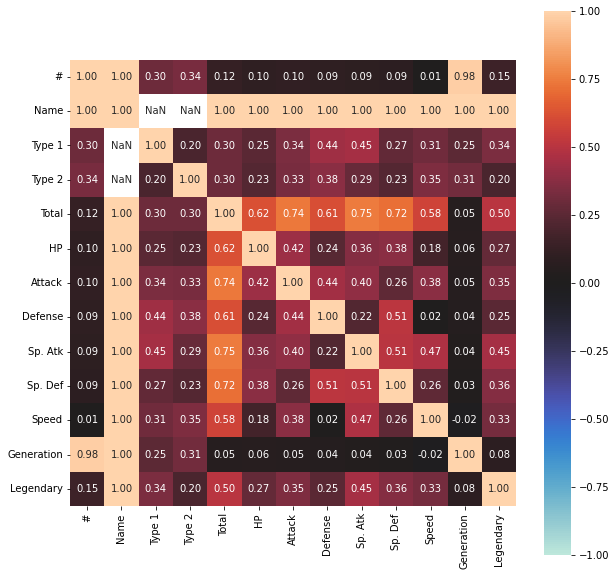

In [5]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))

In [6]:
complete_correlation

{'ax': <AxesSubplot:>,
 'corr':                    #  Name    Type 1    Type 2     Total        HP    Attack  \
 #           1.000000   1.0  0.299379  0.335811  0.119813  0.097614  0.102298   
 Name        1.000000   1.0  0.000000  0.000000  1.000000  1.000000  1.000000   
 Type 1      0.299379   0.0  1.000000  0.199522  0.302663  0.247128  0.341423   
 Type 2      0.335811   0.0  0.199522  1.000000  0.299830  0.229100  0.330608   
 Total       0.119813   1.0  0.302663  0.299830  1.000000  0.618748  0.736211   
 HP          0.097614   1.0  0.247128  0.229100  0.618748  1.000000  0.422386   
 Attack      0.102298   1.0  0.341423  0.330608  0.736211  0.422386  1.000000   
 Defense     0.094786   1.0  0.437300  0.382557  0.612787  0.239622  0.438687   
 Sp. Atk     0.088759   1.0  0.445656  0.287475  0.747250  0.362380  0.396362   
 Sp. Def     0.085817   1.0  0.266332  0.230671  0.717609  0.378718  0.263990   
 Speed       0.010733   1.0  0.310062  0.346004  0.575943  0.175952  0.381240 

# Correlation Matrix Of Complete Dataset


In [7]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.00,1.00,0.30,0.34,0.12,0.10,0.10,0.09,0.09,0.09,0.01,0.98,0.15
Name,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Type 1,0.30,0.00,1.00,0.20,0.30,0.25,0.34,0.44,0.45,0.27,0.31,0.25,0.34
Type 2,0.34,0.00,0.20,1.00,0.30,0.23,0.33,0.38,0.29,0.23,0.35,0.31,0.20
Total,0.12,1.00,0.30,0.30,1.00,0.62,0.74,0.61,0.75,0.72,0.58,0.05,0.50
HP,0.10,1.00,0.25,0.23,0.62,1.00,0.42,0.24,0.36,0.38,0.18,0.06,0.27
Attack,0.10,1.00,0.34,0.33,0.74,0.42,1.00,0.44,0.40,0.26,0.38,0.05,0.35
Defense,0.09,1.00,0.44,0.38,0.61,0.24,0.44,1.00,0.22,0.51,0.02,0.04,0.25
Sp. Atk,0.09,1.00,0.45,0.29,0.75,0.36,0.40,0.22,1.00,0.51,0.47,0.04,0.45
Sp. Def,0.09,1.00,0.27,0.23,0.72,0.38,0.26,0.51,0.51,1.00,0.26,0.03,0.36


# Heat Map Of Complete Dataset


In [8]:
selected_column= df[categorical_features]
categorical_df = selected_column.copy()

/usr/local/lib/python3.7/dist-packages/dython/nominal.py:139: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  RuntimeWarning)


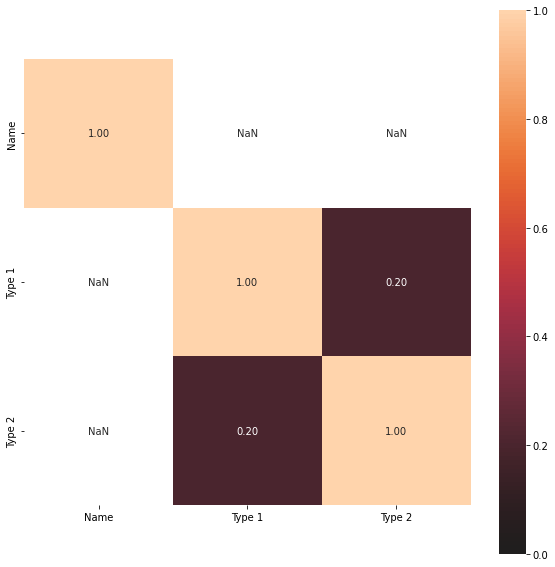

In [9]:
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))